<a href="https://colab.research.google.com/github/royanurag005/Image_classification_Segmentation_model_Rust_No_Rust/blob/main/rust_classification_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#import necessary modules
import tensorflow as tf
#The above is for model building
from tensorflow.keras import models, layers
import matplotlib.pyplot as plot
data = '/content/gdrive/MyDrive/256 *256 rust'


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE = 16
CHANNELS=3
EPOCHS=50

In [ ]:

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    data ,
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE) ,
    batch_size = BATCH_SIZE

)

Found 1819 files belonging to 2 classes.


In [ ]:
class_names=dataset.class_names

In [ ]:
class_names


['CORROSION', 'NOCORROSION']

In [ ]:
len(dataset)

114

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


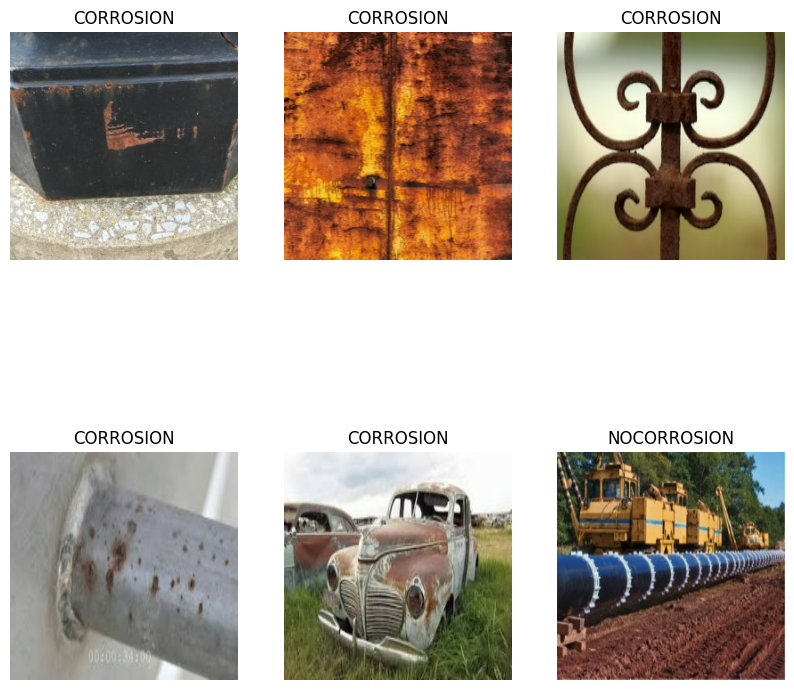

In [ ]:
plot.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
  # print(image_batch.shape)
  # print(label_batch.numpy())

  for i in range(6):
    ax=plot.subplot(2,3,i+1)
    print(image_batch[i].shape)
    plot.imshow(image_batch[i].numpy().astype("uint8"))
    plot.axis("off")
    plot.title(class_names[label_batch[i]])

In [ ]:
print(image_batch[0].numpy())


[[[106. 120. 129.]
  [100. 114. 123.]
  [106. 120. 131.]
  ...
  [ 51.  61.  62.]
  [ 51.  60.  65.]
  [ 53.  64.  68.]]

 [[ 94. 108. 117.]
  [ 98. 112. 121.]
  [103. 117. 128.]
  ...
  [ 54.  62.  64.]
  [ 52.  62.  64.]
  [ 53.  64.  68.]]

 [[ 90. 104. 113.]
  [ 94. 108. 117.]
  [ 92. 109. 119.]
  ...
  [ 57.  65.  67.]
  [ 54.  64.  66.]
  [ 54.  64.  66.]]

 ...

 [[189. 181. 160.]
  [189. 181. 160.]
  [187. 179. 158.]
  ...
  [184. 172. 146.]
  [189. 178. 150.]
  [178. 167. 139.]]

 [[172. 164. 143.]
  [162. 154. 133.]
  [169. 161. 142.]
  ...
  [181. 170. 142.]
  [186. 175. 147.]
  [169. 158. 130.]]

 [[170. 162. 141.]
  [177. 169. 148.]
  [176. 168. 149.]
  ...
  [182. 171. 143.]
  [181. 170. 142.]
  [157. 146. 118.]]]


In [ ]:
len(dataset)

114

In [ ]:
#Taking
# 80% of the data for training
# 20% --> 10% for testing and 10 % for validation


In [ ]:
train_size=.8
print(train_size*len(dataset))

91.2


In [ ]:
train_ds=dataset.take(88)
#In reference to the above result
len(train_ds)

88

In [ ]:
test_ds=dataset.skip(88)
len(test_ds)

26

In [ ]:
val_size=0.1
val_size*len(dataset)

11.4

In [ ]:
val_ds=test_ds.take(11)
len(val_ds)


11

In [ ]:
test_ds=test_ds.skip(11)
len(test_ds)

15

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8,test_split=0.1,valid_split=0.1,shuffle=True, shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size , seed=12 )

  train_size=int(ds_size*train_split)
  val_size=int(ds_size*valid_split)
  test_size=int(ds_size*test_split)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds



In [ ]:
train_ds , test_ds , valid_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

91

In [ ]:
len(test_ds)

11

In [ ]:
len(val_ds)

11

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#Optimisation for training performance

In [ ]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255) ,
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE)


])


In [ ]:
#data_augmentation
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
# from tensorflow import keras
# from tensorflow.keras import layers
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes = 3

# model = keras.Sequential([
#     resize_and_rescale,
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
#     layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),

# ])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (16, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
91/91 [==============================] - 282s 74ms/step - loss: 0.7244 - accuracy: 0.5417 - val_loss: 0.6809 - val_accuracy: 0.5966
Epoch 2/50
91/91 [==============================] - 3s 31ms/step - loss: 0.7021 - accuracy: 0.5396 - val_loss: 0.6510 - val_accuracy: 0.5966
Epoch 3/50
91/91 [==============================] - 3s 31ms/step - loss: 0.6347 - accuracy: 0.6699 - val_loss: 0.5339 - val_accuracy: 0.7614
Epoch 4/50
91/91 [==============================] - 3s 32ms/step - loss: 0.5701 - accuracy: 0.7409 - val_loss: 0.5283 - val_accuracy: 0.7784
Epoch 5/50
91/91 [==============================] - 3s 30ms/step - loss: 0.5420 - accuracy: 0.7595 - val_loss: 0.5017 - val_accuracy: 0.7898
Epoch 6/50
91/91 [==============================] - 3s 30ms/step - loss: 0.5309 - accuracy: 0.7602 - val_loss: 0.5102 - val_accuracy: 0.8011
Epoch 7/50
91/91 [==============================] - 3s 29ms/step - loss: 0.4829 - accuracy: 0.7898 - val_loss: 0.4434 - val_accuracy: 0.8125
Epoch 8/50


In [ ]:
scores=model.evaluate(test_ds)

11/11 [==============================] - 5s 14ms/step - loss: 0.5420 - accuracy: 0.9602


In [ ]:
scores

[0.5419612526893616, 0.9602272510528564]

In [ ]:
history


In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 91}


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
history.history['accuracy']

[0.5416953563690186,
 0.5396278500556946,
 0.6698828339576721,
 0.7408683896064758,
 0.7594762444496155,
 0.7601653933525085,
 0.7898001670837402,
 0.793935239315033,
 0.8173673152923584,
 0.793935239315033,
 0.8215023875236511,
 0.8332184553146362,
 0.8421778082847595,
 0.8683666586875916,
 0.8780151605606079,
 0.8835285902023315,
 0.9069607257843018,
 0.9145417213439941,
 0.9228118658065796,
 0.9338387250900269,
 0.9124741554260254,
 0.9476223587989807,
 0.9648517966270447,
 0.9682977199554443,
 0.958649218082428,
 0.9510682225227356,
 0.960716724395752,
 0.9710544347763062,
 0.9800137877464294,
 0.9862164258956909,
 0.9579600095748901,
 0.9682977199554443,
 0.9648517966270447,
 0.9834597110748291,
 0.9889731407165527,
 0.9862164258956909,
 0.9600275754928589,
 0.9910406470298767,
 0.9931082129478455,
 0.9986216425895691,
 0.9979324340820312,
 0.9993107914924622,
 0.9993107914924622,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


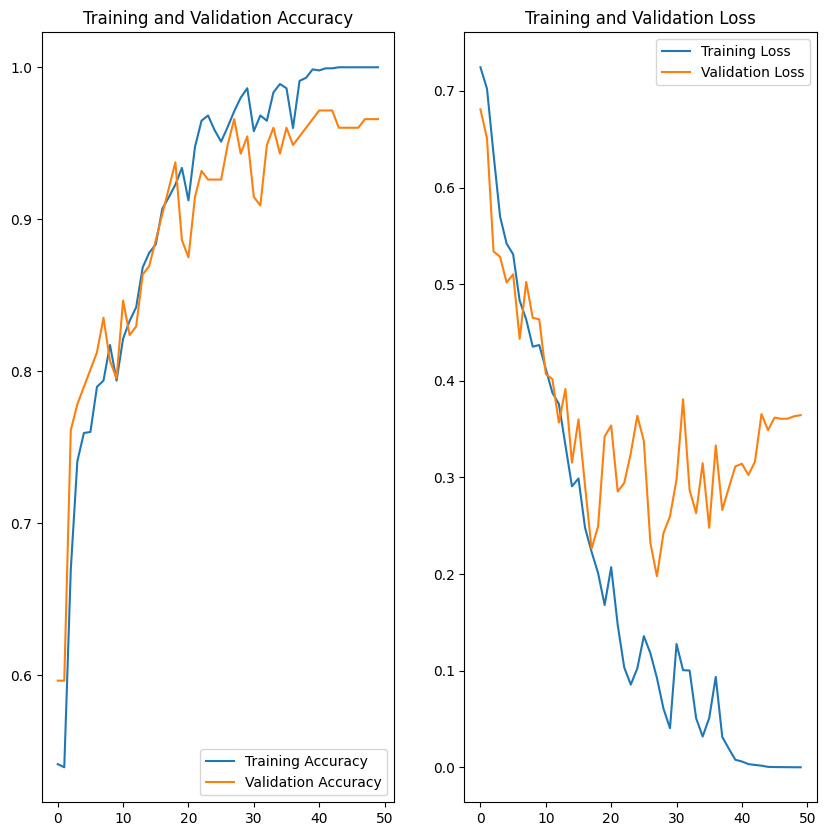

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS) , acc , label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: CORROSION
1/1 [==============================] - 0s 25ms/step
predicted label: CORROSION


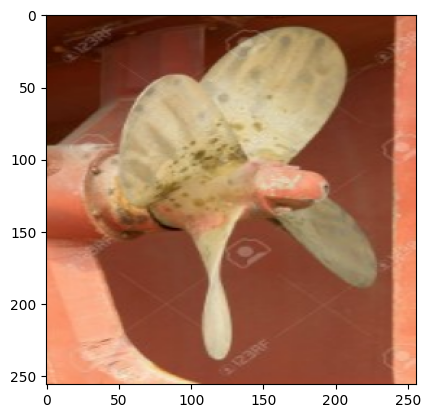

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    # plt.imshow(images_batch[0].numpy().astype('uint8'))
    first_image = images_batch[0].numpy().astype('uint8')

    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
first_image = images_batch[0].numpy().astype('uint8')

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


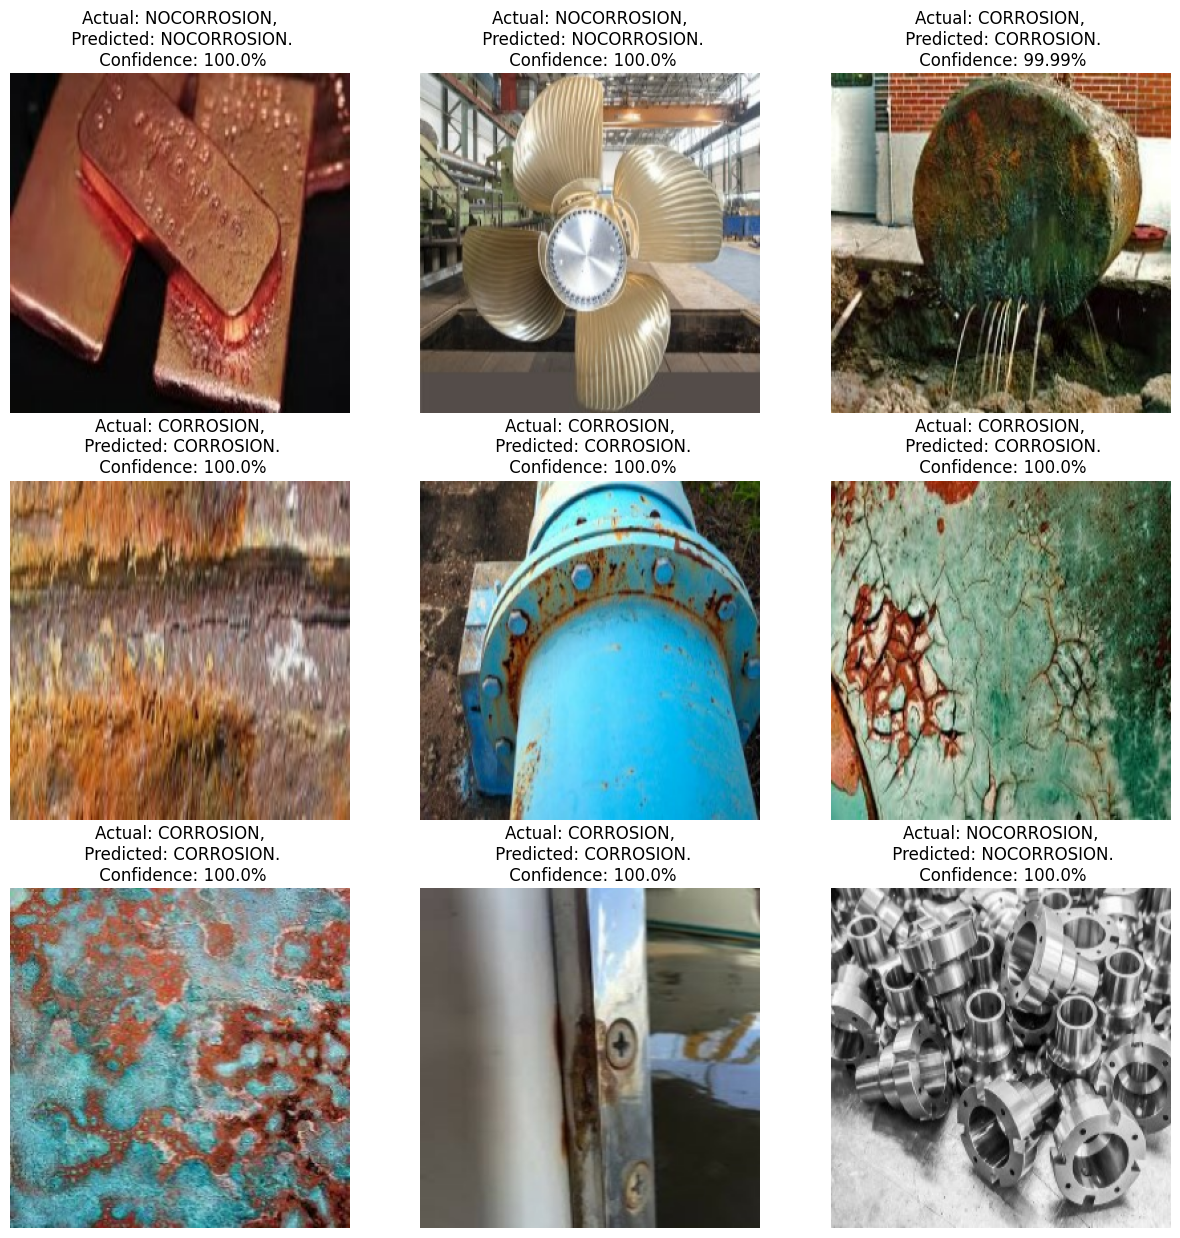

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
model.save('/content/gdrive/MyDrive/model_image_classification')

In [ ]:
# from tensorflow.keras.models import load_model

# Load the model
# model = load_model('/content/drive/My Drive/path/to/your/folder/model.h5')